# EXPLAINER NOTEBOOK

This is the explainer notebook for the New York taxi dataset analysis. It contains all the behind-the-scene details about our website, including all the python code than has been used in order to get the data necessary for our visualizations.

# Motivation

** 1. What is our dataset? **

We have chosen to work on the New York taxi dataset from 2013. It contains all the taxi trips that occured in New York between the $1^{st}$ of January and the $31^{st}$ of December 2013.

However, we soon realized that this was a really huge dataset, containing 173,179,759 rows, representing 5.3 GO of data. The original dataset can be retreived here:  https://nycopendata.socrata.com/view/7rnv-m532

The size of the dataset was a problem, has we need to keep a reasonable loading duration for our visualization. For this reason, we have used a reduced dataset, which can be downloaded here: https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip. It was built by chosing randomly 1/200 datapoints. The selected rows were then ordered chronologically. This is why the dataset we will be working with contains only 846,941 rows, which represents 240 MO of data.

We will give more details about the content of the dataset in the next section of this notebook.

** 2. Why did we choose it? **

Several reasons made us choose this dataset. 

First, it concerns New York, a big city, for which it is really easy to get open data. It was a way to make sure that we would get a dataset whith a good quality, and containing enough information to dive deeply into the dataset.

Moreover, the dataset contains many different columns, giving a wide variety of information, which is interesting because it allows very different kind of analysis depending of the point of view used to analyse the data. For example, we could do nice work with the geodata, but we also have a large range of data related to the details of the trip, as well as all the different factors that have been taken into account when calculating the price of the journey.

Finally, all memebrs of the team were really interested by the taxi dataset in general. It's something that can concern almost everybody, because it is a service we can have an opportunity to use in our everyday life. And we were quite surprised by the number of data that can be generated by a single taxi trip, and it made us want to look deeper into the details of the dataset.

** 3. What is our goal for the user's experience? **

Our main goal is closely related to our motivations for choosing the dataset: we would like to show that even if a single taxi trip can look like simething quite simple, it generates a lot of data, and that the accumulation of data from several trips can reveal erally interesting patterns that might not seem obviously related to taxis.

# Basic Stats

Now, let's try to understand the dataset better.

We have two files, one for the trip itself, and one for the price of the trip. Let's load those two files, and look at the basic information we can retrieve from them.

In [6]:
import csv

# Import files for reading
infile = open("nyc_data.csv", 'r')
infile2 = open("nyc_fare.csv", 'r')

reader = csv.reader(infile)
reader2 = csv.reader(infile2)

print 'Information contained in the first file:'
print reader.next()
print '\nInformation contained in the second file:'
print reader2.next()

# Store the rows in lists
taxi_file = []
taxi_file2 = []

for line in reader:     
    taxi_file.append(line)
    
for line2 in reader2:                  
    taxi_file2.append(line2)
    
print '\nNumber of rows in first file:', len(taxi_file)
print 'Number of rows in second file:', len(taxi_file)

Information contained in the first file:
['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

Information contained in the second file:
['medallion', 'hack_license', 'vendor_id', 'pickup_datetime', 'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']

Number of rows in first file: 846945
Number of rows in second file: 846945


As we can see, both files have the same number of rows, which is reassuring, because when those two files were constructed, each line in the first file was supposed to correspond to the same trip than the corresponding line in the second file. 

Now, we can look into the details of our dataset. Let's plot some histograms: we will start by extracting all the data we need to plot everything we want.

In [25]:
from collections import Counter
import datetime

months = []
hours = []
weekdays = []
monday_hours = []
tuesday_hours = []
wenesday_hours = []
thursday_hours = []
friday_hours = []
saturday_hours = []
sunday_hours = []

for d in taxi_file:
    daytime = d[5]
    date, time = daytime.split(" ")
    year, month, day = date.split("-")
    my_date = datetime.date(int(year), int(month), int(day))
    weekdays.append(my_date.weekday())
    hour, minute, second = time.split(":")
    months.append(month)
    hours.append(hour)
    if(my_date.weekday() == 0):
        monday_hours.append(hour)
    if(my_date.weekday() == 1):
        tuesday_hours.append(hour)
    if(my_date.weekday() == 2):
        wenesday_hours.append(hour)
    if(my_date.weekday() == 3):
        thursday_hours.append(hour)
    if(my_date.weekday() == 4):
        friday_hours.append(hour)
    if(my_date.weekday() == 5):
        saturday_hours.append(hour)
    else:
        sunday_hours.append(hour)

    hour, minute, second = time.split(":")
    months.append(month)
    hours.append(hour)
    
histogram1 = Counter(months)
histogram2 = Counter(hours)
histogram3 = Counter(weekdays)
histogram4 = Counter(monday_hours)
histogram5 = Counter(tuesday_hours)
histogram6 = Counter(wenesday_hours)
histogram7 = Counter(thursday_hours)
histogram8 = Counter(friday_hours)
histogram9 = Counter(saturday_hours)
histogram10 = Counter(sunday_hours)

Now we can start plotting! We will start easy, by showing the number of pick-ups per month.

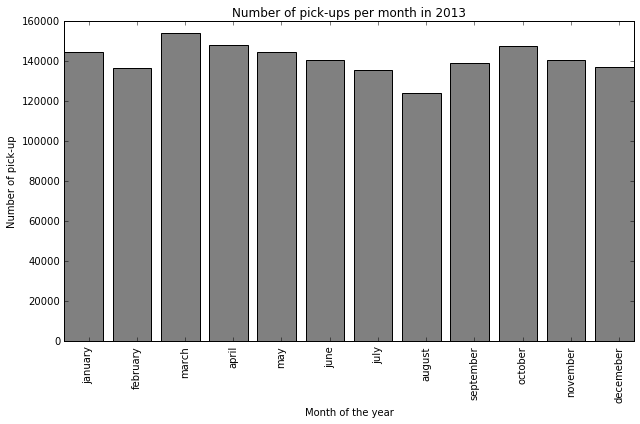

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib import rcParams

sorted_keys =[]
values = []

for key in sorted(histogram1):
    sorted_keys.append(key)
    values.append(histogram1[key])

pos = np.arange(len(sorted_keys))
width = 0.8     # gives histogram aspect to the bar diagram

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
labels=["january","february","march","april","may","june","july","august","september","october","november","decemeber"]
ax.set_xticklabels(labels)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Month of the year')
plt.title('Number of pick-ups per month in 2013')

plt.bar(pos, values, width, color='0.5')
plt.show()

As we can see on this first histogram, the number of pick-ups doesn't change so much over the month. However, we can still see some patterns that we can try to explain.

It seems that the busiest month of the year is march. After that, it slowly decreases before reaching the lowest point in August, and the activity goes back to higher levels from september. 

Two factors could explain this tendancy: the weather and the summer holidays. In march, it might raining a lot while temperatures are still cold, encouraging people to take a cab instead of walking. In the following months, the temperature will increase and the sun will shine. At the same time, people living in New York might go on summer holidays, living the city to the tourists. Those two factors combined can explain part of the pattern observed on the above histogram.

Now, let's look at the number of pick-ups per hour:

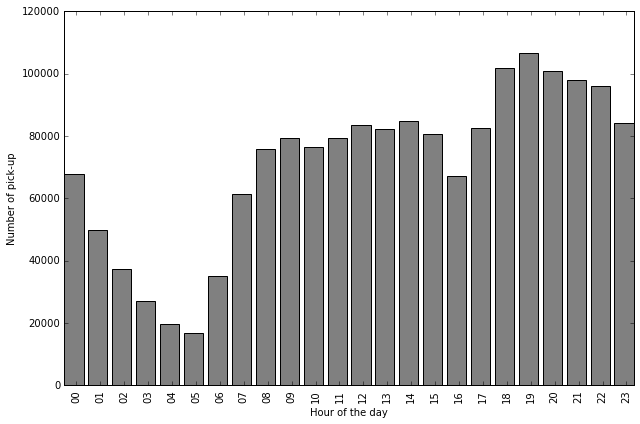

In [12]:
sorted_keys =[]
values = []

for key in sorted(histogram2):
    sorted_keys.append(key)
    values.append(histogram2[key])

pos = np.arange(len(sorted_keys))
width = 0.8

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(sorted_keys)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], sorted_keys, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Hour of the day')

plt.bar(pos, values, width, color='0.5')
plt.savefig("hist_month.jpg")

plt.show()

This time, it looks quite different: we can clearly identify different periods over the day. The busiest one is between 19h and 22h. It probably corresponds to the moment when people live work and/or go out to restaurants or clubs.

We can also notice a really low number of pick-ups between 2 and 5 am. This is probably because most people are sleeping. Then the activity suddenly increases around 7h, when people are starting to go to work.

This histogram was really interesting, but it feels like some part of the story is missing: can we really expect a similar behaviour for the different days of the week? 

Let's first see how the number of pick-ups is distributed over the week.

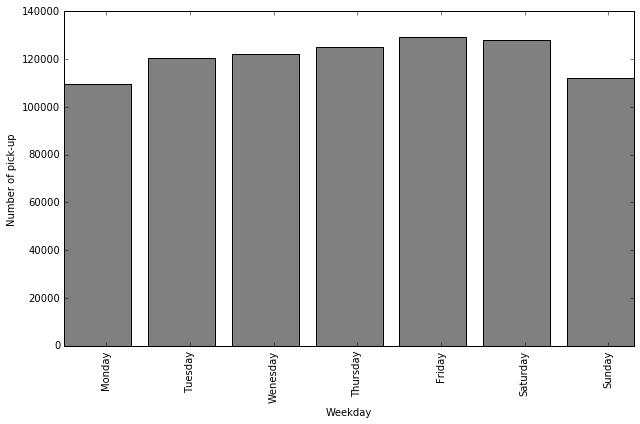

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

sorted_keys =[]
values = []

for key in sorted(histogram3):
    sorted_keys.append(key)
    values.append(histogram3[key])

pos = np.arange(len(sorted_keys))
width = 0.8     # gives histogram aspect to the bar diagram

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
labels=["Monday","Tuesday","Wenesday","Thursday","Friday","Saturday","Sunday"]
ax.set_xticklabels(labels)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Weekday')

plt.bar(pos, values, width, color='0.5')
plt.savefig("hist_weekdays.jpg")
plt.show()

As we can see, there is no huge difference between the different days. The sunday is the less busy day, probably because this is when most people enjoy family time at home.Monday is also surprisingly low compared to the other days. There is no obvious explenation for this, exept maybe that monday is the closing day for many shops.

Let's now plot the number of pick-ups per hour for each day.

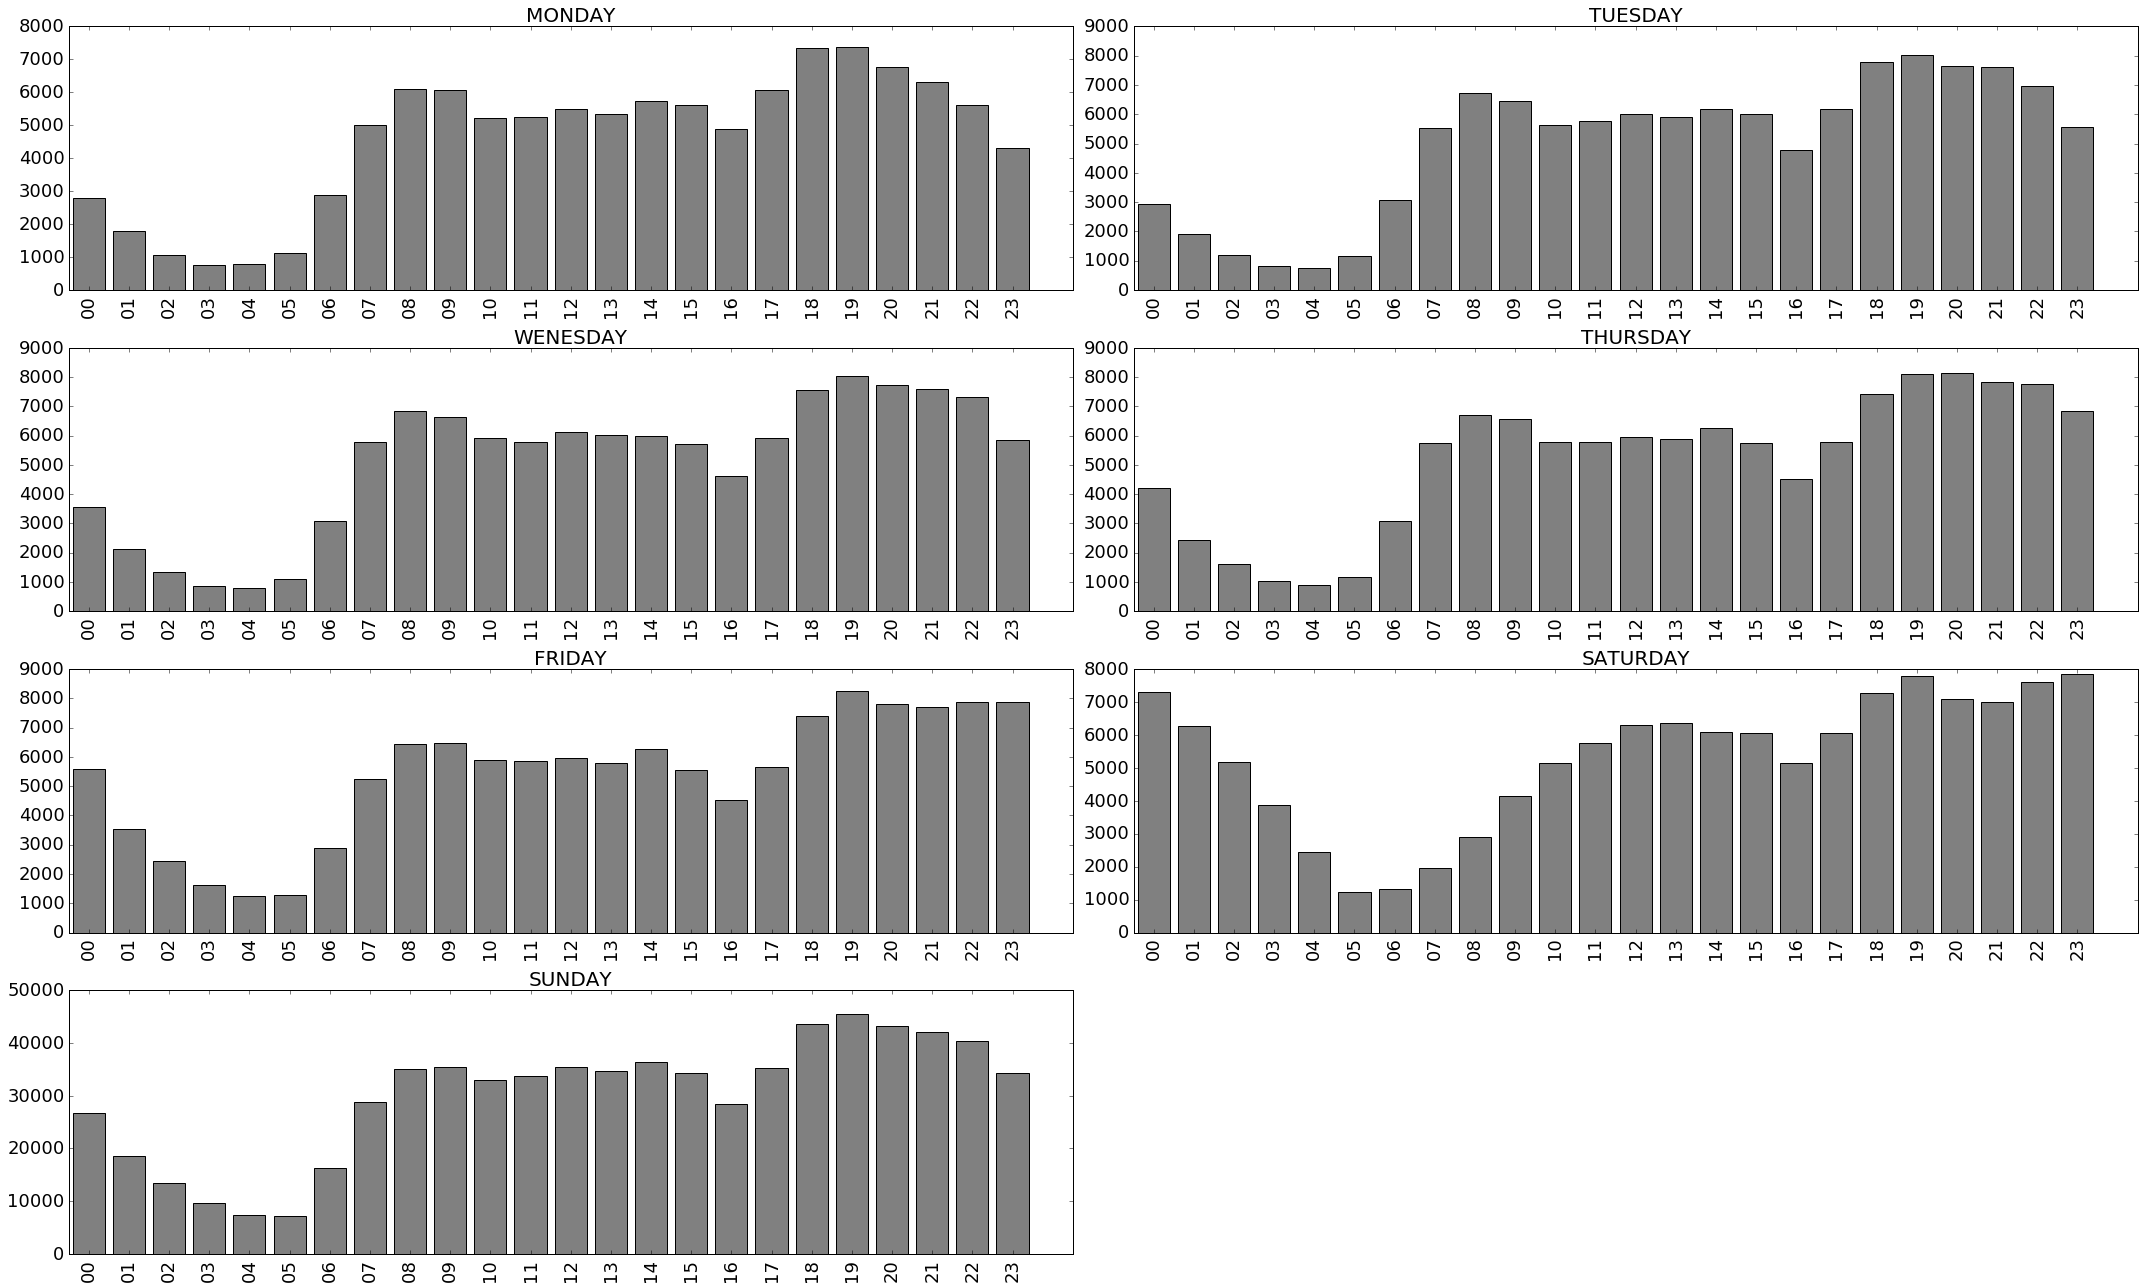

In [35]:
fig, ax = plt.subplots(4, 2)
fig.subplots_adjust(hspace=.5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size


def plot_hist(i, j, hist, title):
    sorted_keys =[]
    values = []

    for key in sorted(hist):
        sorted_keys.append(key)
        values.append(hist[key])

    ax[i,j].tick_params(axis='both', which='major', labelsize=18)
    ax[i,j].set_title(title, fontsize=20)
    xs = [k +0.1 for k,_ in enumerate(sorted_keys)]
    ax[i,j].bar(xs, values,color='0.5')   

    ax[i,j].set_xticks([l + 0.5 for l,_ in enumerate(sorted_keys)])
    ax[i,j].set_xticklabels(sorted_keys, rotation='vertical')

plot_hist(0, 0, histogram4, 'MONDAY')
plot_hist(0, 1, histogram5, 'TUESDAY')
plot_hist(1, 0, histogram6, 'WENESDAY')
plot_hist(1, 1, histogram7, 'THURSDAY')
plot_hist(2, 0, histogram8, 'FRIDAY')
plot_hist(2, 1, histogram9, 'SATURDAY')
plot_hist(3, 0, histogram10, 'SUNDAY')
ax[3,1].axis('off')
plt.show()

This plot is really interesting. First, we can see the same tendancy than what we explained before: a big activity in the evening around 7pm, almost no activity around 5am. We can also note a low activity around 4pm compared to the rest of the afternoon.

However, it is really relevant to compare saturday to other days: the activity at night time is much more import than for any other day. There is a shift compared to the other days: the activity only really starts around the and of the morning, much later than usual, but continues until 3am. This is probably because people are going out on saturday night, and going home with cabs because there are not subways anymore.

So far, we have focused a lot on the pick-ups timing. However, the dataset is so rich that they are many other attributes we can have a look at. 

For example, we can have a look at the geodata we have, with a heat map representing the pick-up locations:

In [37]:
import geoplotlib
from geoplotlib.utils import BoundingBox
import numpy as np
from geoplotlib.utils import BoundingBox

geo_data_for_plotting = {"lat": [float(line[11]) for line in taxi_file],
                         "lon": [float(line[10]) for line in taxi_file]}

geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-4)
offset = 0.06
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox(north = np.mean(geo_data_for_plotting["lat"]) + offset, south = np.mean(geo_data_for_plotting["lat"]) - offset, east = np.mean(geo_data_for_plotting["lon"]) + offset, west = np.mean(geo_data_for_plotting["lon"])-offset))
geoplotlib.inline()

('smallest non-zero count', 3.0981036790962477e-07)
('max count:', 86.496980412463842)


As we can see, the vast majority of pick-ups are located on Manhattan. 

We could also talk about the distances of the trip, the amount of the trip, and many other attributes we have at our disposal. However, we will talk about them later in our theory section, when such an analysis will be relevant for explaining the machine learning method we've used.

# Theory

Now that we've been briefly over the dataset, it's time to dive even deeper. In this section, we will describe the machine learning methods we've used and applied to problems that seemed relevant to us.

** 1. Predict the tip given by a client **

The first problem we wanted to solve is to predict how much a client is likely to tip. 